<a href="https://colab.research.google.com/github/Slimlav/Netology/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BD%D0%BE%D0%B9_%D0%B3%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Выберите ряд из первого задания и постройте его модель GARCH. Отчет нужно будет оформить в jupyter-ноутбук.**

In [4]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 8.5 MB/s 


In [5]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from arch import arch_model

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [13]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [6]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv').dropna().values[:, 1]

In [7]:
series

array([890.19, 901.8, 888.51, 887.78, 858.43, 850.61, 856.02, 880.91,
       908.15, 912.75, 911.0, 908.22, 889.31, 893.98, 893.91, 874.85,
       852.37, 839.0, 840.39, 812.94, 810.67, 816.55, 859.59, 856.75,
       873.8, 881.17, 890.2, 910.37, 906.68, 907.44, 906.38, 906.68,
       917.59, 917.52, 922.79, 942.43, 939.87, 942.88, 942.28, 940.7,
       962.6, 967.72, 963.8, 954.17, 941.23, 941.83, 961.54, 971.25,
       961.39, 934.45, 945.06, 944.69, 929.03, 938.06, 922.26, 920.45,
       926.7, 951.76, 964.18, 965.83, 959.36, 970.05, 961.24, 947.23,
       943.03, 953.27, 945.36, 930.46, 942.81, 946.42, 984.12, 995.26,
       1005.57, 1025.21, 1023.43, 1033.19, 1027.24, 1004.21, 1020.02,
       1047.49, 1039.36, 1026.19, 1003.54, 980.81, 979.46, 979.23, 959.89,
       961.32, 972.23, 963.05, 922.71, 951.01, 931.07, 959.36, 963.2,
       922.19, 953.87, 927.89, 895.17, 930.84, 893.96, 920.0, 888.55,
       879.82, 891.71, 870.11, 885.99, 910.9, 936.71, 908.87, 852.38,
       871.84, 

In [8]:
series = series[12:] - series[:-12]
series = series[1:] - series[:-1]

In [9]:
series = series.astype(float)

In [10]:
p_ = 4
o_ = 0
q_ = 4

am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -698.436
Distribution:      Standardized Student's t   AIC:                           1418.87
Method:                  Maximum Likelihood   BIC:                           1451.92
                                              No. Observations:                  149
Date:                      Tue, Oct 04 2022   Df Residuals:                      148
Time:                              06:03:50   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1

Results of Dickey-Fuller Test:
Test Statistic                  -3.365230
p-value                          0.012203
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


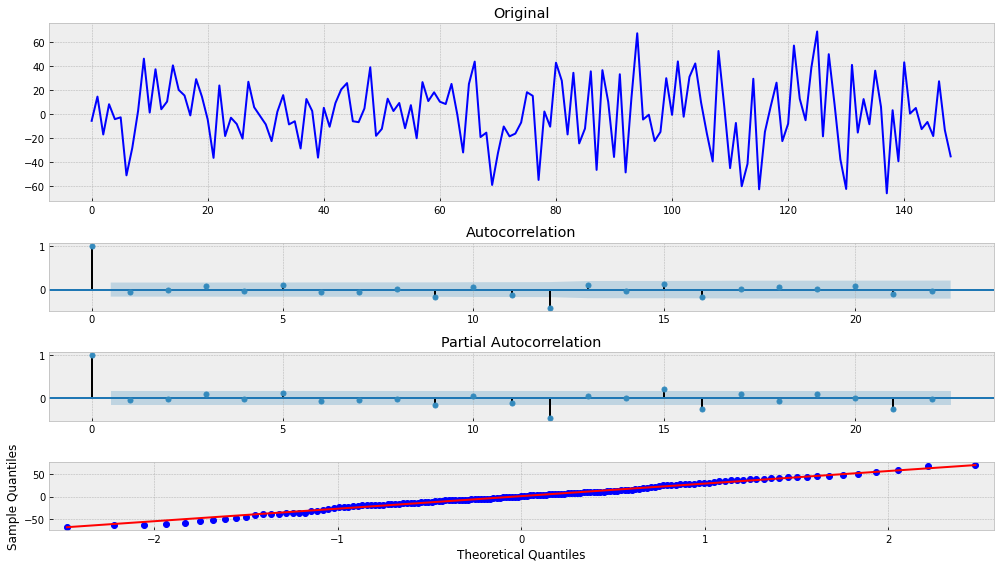

In [14]:
tsplot(res.resid)